# Import Statements

In [2]:
import numpy as np
import math
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist

Populating the interactive namespace from numpy and matplotlib


# Create Data

In [3]:
np.random.seed(4294967295) # random seed for consistency

# Cell 1 Data

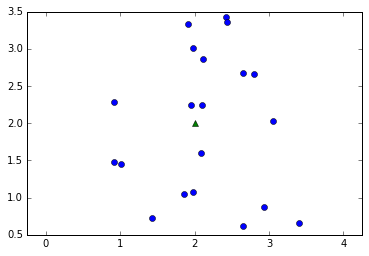

In [4]:
#Set parameters
mean_cell1 = [2, 2]
cov = [[1, 0], [0, 1]]
x1, y1 = np.random.multivariate_normal(mean_cell1, cov, 20).T
plt.plot(x1, y1, 'o')
plt.plot(2,2, '^')
plt.axis('equal')
plt.show()

# Cell 2 Data

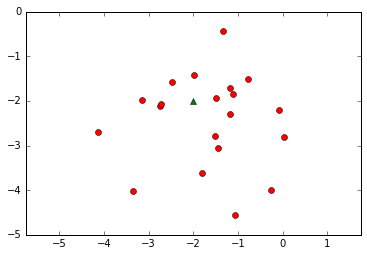

In [5]:
mean_cell2 = [-2, -2]
cov = [[1, 0], [0, 1]]
x2, y2 = np.random.multivariate_normal(mean_cell2, cov, 20).T
plt.plot(x2, y2, 'o', color='red')
plt.plot(-2,-2, '^', color='green')
plt.axis('equal')
plt.show()

# Both Cells Plots

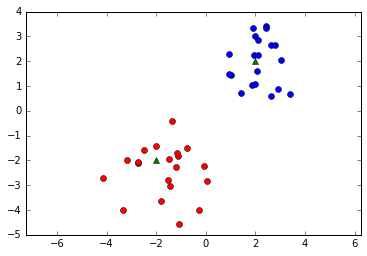

In [6]:
plt.plot(x2, y2, 'o', color='red')
plt.plot(-2,-2, '^', color='green')
plt.axis('equal')
plt.plot(x1, y1, 'o')
plt.plot(2,2, '^')
plt.show()

# Apply Drop Out

In [7]:
x1_y1 = [x1, y1]
x1_y1

[array([ 2.64840867,  0.91945628,  2.11388774,  1.95597398,  1.01176985,
         1.97384186,  2.64437451,  2.42005442,  2.08608548,  3.05232244,
         1.85361708,  1.90635979,  2.43132745,  3.40956779,  0.92007469,
         1.97254783,  2.10243261,  1.42084063,  2.79774455,  2.92820363]),
 array([ 2.66932353,  2.28450104,  2.86762189,  2.24877162,  1.45407729,
         3.00437642,  0.61462135,  3.43319167,  1.59869409,  2.03232405,
         1.05383746,  3.33704142,  3.35522792,  0.66136697,  1.47913189,
         1.07779786,  2.24923551,  0.72137668,  2.66657167,  0.87095746])]

In [8]:
x2_y2 = [x2, y2]
x2_y2

[array([-1.49223031, -2.47391497, -0.77270646, -3.35110557, -3.15968948,
        -2.74155116,  0.03634112, -1.80130793, -4.12636604, -0.07097931,
        -1.10393812, -2.73448472, -1.18149594, -1.52494621, -1.34211304,
        -1.17810581, -1.98815547, -1.07283121, -1.45510498, -0.26842712]),
 array([-1.94476761, -1.58700752, -1.51522194, -4.01389028, -1.96964144,
        -2.11300313, -2.81310207, -3.61758761, -2.69495935, -2.21350509,
        -1.83712741, -2.07048343, -2.28408614, -2.78400306, -0.4260044 ,
        -1.70621239, -1.42921295, -4.56589176, -3.05009087, -4.00096159])]

In [9]:
#parameters
lmbda = -.5
mu = 2
p_0 = math.e**(lmbda * mu**2)

def drop_out(p):
    return np.random.binomial(1, p, 1)[0]

def noise(p):
    return np.random.normal(0, 0.2, 1)[0]

In [10]:
def apply_fuzz(points):
    for index in range(len(points[0])):
        points[0][index] += noise(0)
        points[1][index] += noise(0)
        if drop_out(p_0) == 1:
            points[0][index] = 0
            points[1][index] = 0
    return points

In [11]:
droppedx1_y1 = apply_fuzz(np.copy(x1_y1))
droppedx1_y1

array([[ 2.47749398,  0.91924829,  2.01957969,  0.        ,  0.75672982,
         2.16141217,  2.40020016,  2.38026849,  2.01645882,  3.04242442,
         2.00662963,  1.47187547,  2.28858403,  3.55348612,  0.72195547,
         1.72347264,  2.06293434,  1.31437635,  3.09112538,  0.        ],
       [ 2.79343214,  2.24867069,  2.54033409,  0.        ,  1.58112968,
         2.82345806,  0.3510922 ,  3.11348126,  1.37373469,  2.03841597,
         0.89645635,  3.70313077,  3.29401601,  0.93068738,  1.426983  ,
         1.28575828,  2.14951975,  0.60677867,  2.56719024,  0.        ]])

In [12]:
droppedx2_y2 = apply_fuzz(np.copy(x2_y2))
droppedx2_y2

array([[-1.55596689, -2.31088586, -0.87058743, -3.25333454, -3.38100561,
         0.        ,  0.        , -1.77349483, -4.11905827, -0.09898561,
        -1.06122896, -2.86535666, -1.37852253, -1.21944997,  0.        ,
        -1.08617461, -1.91172503, -1.35918572, -1.22433056, -0.50956223],
       [-1.98878067, -1.37260265, -1.41794158, -3.9924952 , -1.69664569,
         0.        ,  0.        , -3.60196392, -2.64584623, -1.95065463,
        -2.12908163, -2.30627651, -2.31625529, -2.70595582,  0.        ,
        -1.81764781, -1.42640528, -4.53545952, -3.34452605, -4.28291157]])

# Graphed Fuzzy Data

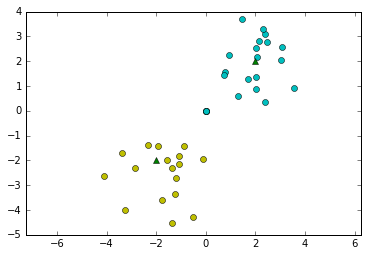

In [13]:
plt.plot(droppedx2_y2[0], droppedx2_y2[1], 'o', color='y')
plt.plot(-2,-2, '^', color='green')
plt.axis('equal')
plt.plot(droppedx1_y1[0], droppedx1_y1[1], 'o', color = 'c')
plt.plot(2,2, '^', color='g')
plt.show()

# Graph of Original vs. Dropped

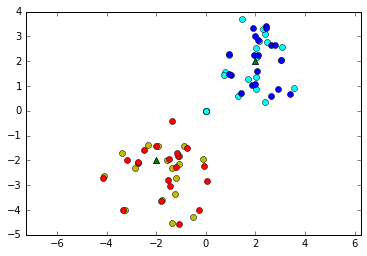

In [14]:
plt.plot(droppedx2_y2[0], droppedx2_y2[1], 'o', color='y')
plt.plot(-2,-2, '^', color='green')
plt.axis('equal')
plt.plot(droppedx1_y1[0], droppedx1_y1[1], 'o', color='cyan')
plt.plot(2,2, '^')
plt.plot(x2, y2, 'o', color='red')
plt.plot(-2,-2, '^', color='green')
plt.axis('equal')
plt.plot(x1, y1, 'o', color ='blue')
plt.plot(2,2, '^')

plt.show()

# Combine Coordinates

In [38]:
matrix = np.concatenate((droppedx1_y1.T, droppedx2_y2.T),)
matrix

array([[ 2.47749398,  2.79343214],
       [ 0.91924829,  2.24867069],
       [ 2.01957969,  2.54033409],
       [ 0.        ,  0.        ],
       [ 0.75672982,  1.58112968],
       [ 2.16141217,  2.82345806],
       [ 2.40020016,  0.3510922 ],
       [ 2.38026849,  3.11348126],
       [ 2.01645882,  1.37373469],
       [ 3.04242442,  2.03841597],
       [ 2.00662963,  0.89645635],
       [ 1.47187547,  3.70313077],
       [ 2.28858403,  3.29401601],
       [ 3.55348612,  0.93068738],
       [ 0.72195547,  1.426983  ],
       [ 1.72347264,  1.28575828],
       [ 2.06293434,  2.14951975],
       [ 1.31437635,  0.60677867],
       [ 3.09112538,  2.56719024],
       [ 0.        ,  0.        ],
       [-1.55596689, -1.98878067],
       [-2.31088586, -1.37260265],
       [-0.87058743, -1.41794158],
       [-3.25333454, -3.9924952 ],
       [-3.38100561, -1.69664569],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-1.77349483, -3.60196392],
       [-4.11905827,

In [39]:
matrix.shape

(40, 2)

In [40]:
matrix

array([[ 2.47749398,  2.79343214],
       [ 0.91924829,  2.24867069],
       [ 2.01957969,  2.54033409],
       [ 0.        ,  0.        ],
       [ 0.75672982,  1.58112968],
       [ 2.16141217,  2.82345806],
       [ 2.40020016,  0.3510922 ],
       [ 2.38026849,  3.11348126],
       [ 2.01645882,  1.37373469],
       [ 3.04242442,  2.03841597],
       [ 2.00662963,  0.89645635],
       [ 1.47187547,  3.70313077],
       [ 2.28858403,  3.29401601],
       [ 3.55348612,  0.93068738],
       [ 0.72195547,  1.426983  ],
       [ 1.72347264,  1.28575828],
       [ 2.06293434,  2.14951975],
       [ 1.31437635,  0.60677867],
       [ 3.09112538,  2.56719024],
       [ 0.        ,  0.        ],
       [-1.55596689, -1.98878067],
       [-2.31088586, -1.37260265],
       [-0.87058743, -1.41794158],
       [-3.25333454, -3.9924952 ],
       [-3.38100561, -1.69664569],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-1.77349483, -3.60196392],
       [-4.11905827,

In [41]:
[list(m) for m in matrix]

[[2.4774939790165207, 2.7934321446221393],
 [0.91924829049278856, 2.2486706868088575],
 [2.0195796873992107, 2.5403340882379108],
 [0.0, 0.0],
 [0.75672981587997468, 1.5811296753347996],
 [2.1614121743991976, 2.8234580565037795],
 [2.4002001632796399, 0.35109220335250535],
 [2.3802684870058837, 3.1134812624397288],
 [2.0164588202724003, 1.3737346946458275],
 [3.0424244194148002, 2.0384159669998141],
 [2.0066296310775655, 0.89645635404122004],
 [1.4718754651567241, 3.7031307679974432],
 [2.2885840316934889, 3.2940160092692707],
 [3.5534861210059052, 0.93068738282882091],
 [0.72195547164638629, 1.4269829981788749],
 [1.7234726370269213, 1.285758281050271],
 [2.0629343446924122, 2.1495197471008005],
 [1.3143763455493502, 0.60677867388093287],
 [3.0911253768593072, 2.5671902356459784],
 [0.0, 0.0],
 [-1.5559668949823919, -1.9887806701357185],
 [-2.3108858573240463, -1.3726026474266002],
 [-0.87058743413426765, -1.4179415787432816],
 [-3.2533345366339486, -3.992495204857156],
 [-3.381005609

# Recovery Time Boys

In [42]:
# kmeans with iterative derivative shit

In [57]:
def clear_drop_out(matrix):
    list_matrix = [list(m) for m in matrix]
    ret_matrix = []
    for index in range(len(list_matrix)):
        if list_matrix[index][0] == 0 and list_matrix[index][1] == 0:
            continue
        ret_matrix.append(list_matrix[index])
    return np.array(ret_matrix)

In [58]:
matrix = clear_drop_out(np.copy(matrix))
matrix

array([[ 2.47749398,  2.79343214],
       [ 0.91924829,  2.24867069],
       [ 2.01957969,  2.54033409],
       [ 0.75672982,  1.58112968],
       [ 2.16141217,  2.82345806],
       [ 2.40020016,  0.3510922 ],
       [ 2.38026849,  3.11348126],
       [ 2.01645882,  1.37373469],
       [ 3.04242442,  2.03841597],
       [ 2.00662963,  0.89645635],
       [ 1.47187547,  3.70313077],
       [ 2.28858403,  3.29401601],
       [ 3.55348612,  0.93068738],
       [ 0.72195547,  1.426983  ],
       [ 1.72347264,  1.28575828],
       [ 2.06293434,  2.14951975],
       [ 1.31437635,  0.60677867],
       [ 3.09112538,  2.56719024],
       [-1.55596689, -1.98878067],
       [-2.31088586, -1.37260265],
       [-0.87058743, -1.41794158],
       [-3.25333454, -3.9924952 ],
       [-3.38100561, -1.69664569],
       [-1.77349483, -3.60196392],
       [-4.11905827, -2.64584623],
       [-0.09898561, -1.95065463],
       [-1.06122896, -2.12908163],
       [-2.86535666, -2.30627651],
       [-1.37852253,

In [ ]:
def find_centroids(matrix):
    

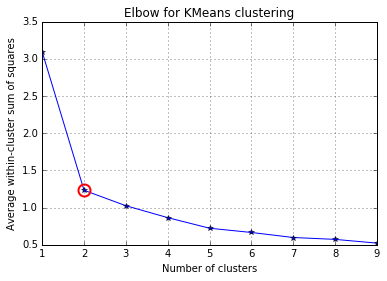

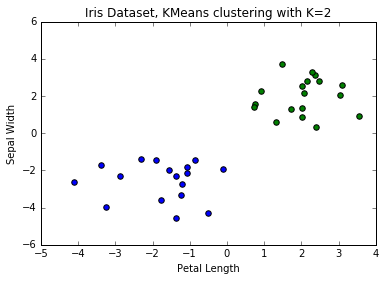

In [65]:
X = matrix

##### cluster data into K=1..10 clusters #####
K = range(1,10)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
#avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

# alternative: scipy.cluster.vq.vq
#Z = [vq(X,cent) for cent in centroids]
#avgWithinSS = [sum(dist)/X.shape[0] for (cIdx,dist) in Z]

# alternative: scipy.spatial.distance.cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

##### plot ###
kIdx = 1

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,0],X[ind,1], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Y')
plt.ylabel('X')
plt.title('Cells, KMeans clustering with K=%d' % K[kIdx])
#plt.legend()

plt.show()

In [67]:
cIdx

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 3, 0, 3, 0, 0,
        3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3]),
 array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 4, 0, 3, 4,
        3, 4, 0, 0, 4, 0, 0, 0, 0, 3, 3, 3]),
 array([4, 3, 4, 3, 4, 0, 4, 0, 4, 0, 4, 4, 0, 3, 3, 4, 3, 4, 2, 2, 2, 1, 1,
        5, 1, 2, 2, 1, 2, 2, 2, 2, 5, 5, 5]),
 array([1, 3, 1, 3, 1, 5, 1, 5, 6, 5, 1, 1, 6, 3, 5, 1, 5, 6, 2, 2, 2, 0, 0,
        4, 0, 2, 2, 0, 2, 2, 2, 2, 4, 4, 4]),
 array([4, 7, 4, 7, 4, 3, 4, 3, 2, 3, 4, 4, 3, 7, 3, 4, 3, 2, 0, 6, 0, 1, 6,
        1, 6, 5, 0, 6, 0, 0, 0, 0, 1, 1, 1]),
 array([4, 0, 4,